In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics
# hide warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

Reading the Housing Data

In [34]:
housingDf = pd.read_csv(r"/Users/chowdani/Downloads/train.csv")
housingDf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [35]:
housingDf.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN

In [36]:
# Dropping highly skewed column 
housingDf.drop(['Utilities','Street','Condition1','Condition2','RoofMatl','LandSlope','LandContour','Electrical','BsmtFinType2','PavedDrive','BsmtCond'],axis=1,inplace=True)

EDA

In [37]:
#check missing percentage
housingDf_missing = (housingDf.isnull().sum() / housingDf.isnull().count()*100).sort_values(ascending = False)
housingDf_missing.head(15)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageQual       5.547945
GarageCond       5.547945
GarageFinish     5.547945
GarageYrBlt      5.547945
GarageType       5.547945
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtFinType1     2.534247
MasVnrType       0.547945
dtype: float64

In [38]:
# Dropping Columns which have more the 45 % records as null
housingDf.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

Analysing the Columns where missing value is less than 45 %

In [39]:
(housingDf.isnull().sum() / housingDf.isnull().count()*100).sort_values(ascending = False)

LotFrontage      17.739726
GarageType        5.547945
GarageYrBlt       5.547945
GarageQual        5.547945
GarageCond        5.547945
GarageFinish      5.547945
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtFinType1      2.534247
MasVnrType        0.547945
MasVnrArea        0.547945
Fireplaces        0.000000
TotRmsAbvGrd      0.000000
KitchenQual       0.000000
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
FullBath          0.000000
Functional        0.000000
Id                0.000000
GarageCars        0.000000
BsmtFullBath      0.000000
GarageArea        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
ScreenPorch       0.000000
PoolArea          0.000000
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
BsmtHalfBath      0.000000
1stFlrSF          0.000000
GrLivArea         0.000000
E

In [40]:
housingDf['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [41]:
# From the above its evident that there is outlier hence imputing with median value
housingDf['LotFrontage']= housingDf.LotFrontage.fillna(housingDf.LotFrontage.median())

<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

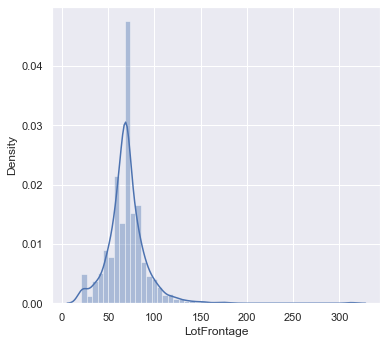

In [42]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.distplot(housingDf['LotFrontage'])

<AxesSubplot:xlabel='GarageFinish', ylabel='count'>

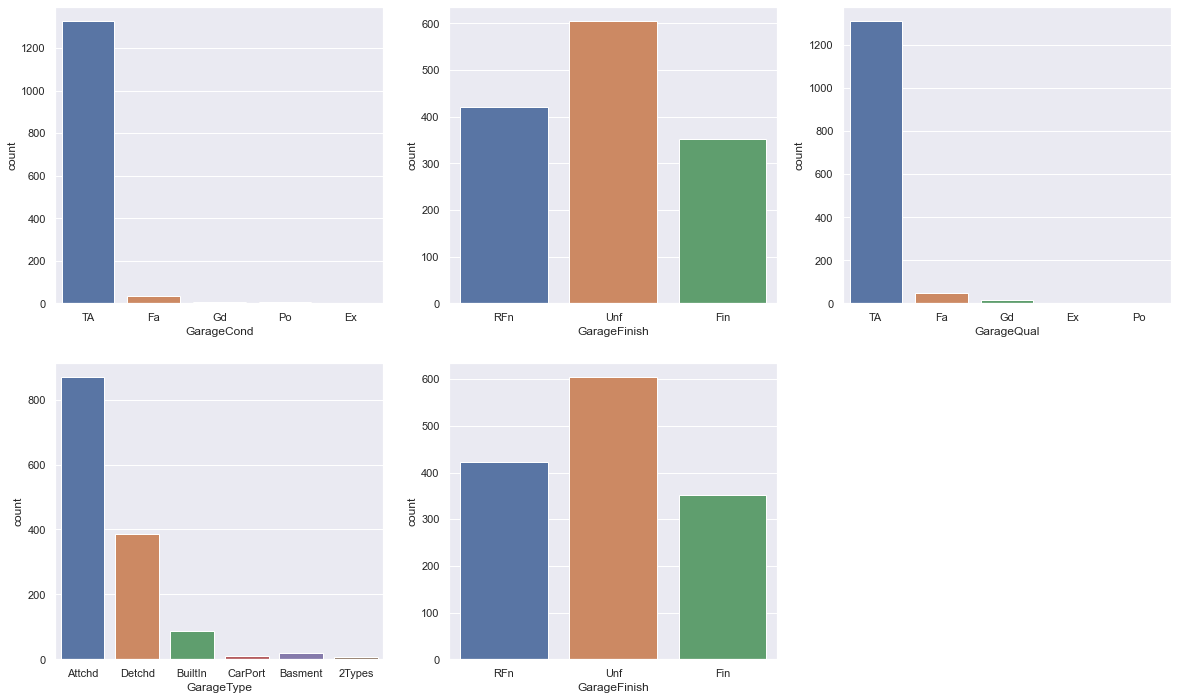

In [43]:
#Visualising the variables wih missing values


plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'GarageCond', data = housingDf)

plt.subplot(2,3,2)
sns.countplot(x = 'GarageFinish',  data = housingDf)

plt.subplot(2,3,3)
sns.countplot(x = 'GarageQual', data = housingDf)
plt.subplot(2,3,4)
sns.countplot(x = 'GarageType', data = housingDf)
plt.subplot(2,3,5)
sns.countplot(x = 'GarageFinish',  data = housingDf)



In [44]:
# Cases when the house doesn't have the garrage so replacing null with No Garrage

housingDf['GarageType'] = housingDf['GarageType'].replace(np.nan, 'No Garage')
housingDf['GarageFinish'] = housingDf['GarageFinish'].replace(np.nan, 'No Garage')
housingDf['GarageCond'] = housingDf['GarageCond'].replace(np.nan, 'No Garage')
housingDf['GarageQual'] = housingDf['GarageQual'].replace(np.nan, 'No Garage')

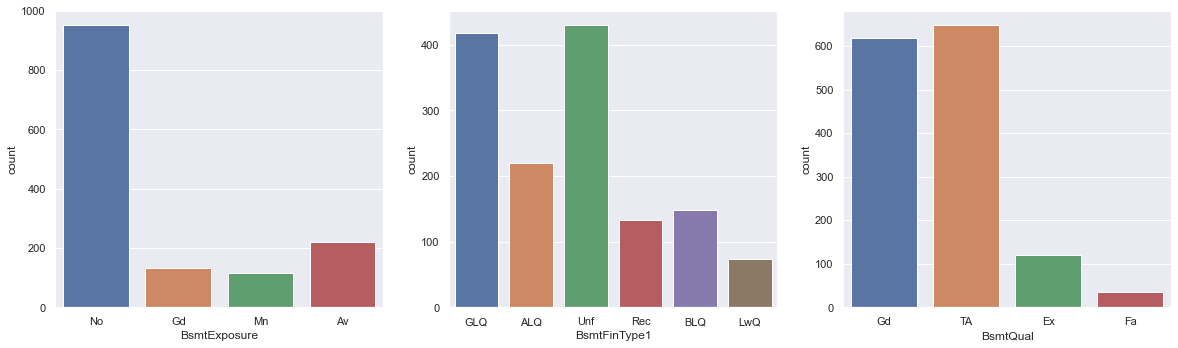

In [45]:
#Visualising the variables wih missing values
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'BsmtExposure', data = housingDf)

plt.subplot(2,3,2)
sns.countplot(x = 'BsmtFinType1', data = housingDf)
plt.subplot(2,3,3)

sns.countplot(x = 'BsmtQual',  data = housingDf)

plt.show()

In [46]:
housingDf['BsmtExposure'] = housingDf['BsmtExposure'].replace(np.nan, 'No Basement')
housingDf['BsmtFinType1'] = housingDf['BsmtFinType1'].replace(np.nan, 'No Basement')
housingDf['BsmtQual'] = housingDf['BsmtQual'].replace(np.nan, 'No Basement')

In [47]:
#check missing percentage
percent_missing = (housingDf.isnull().sum() / housingDf.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(10)

GarageYrBlt     5.547945
MasVnrType      0.547945
MasVnrArea      0.547945
Id              0.000000
BsmtFullBath    0.000000
BsmtHalfBath    0.000000
FullBath        0.000000
HalfBath        0.000000
BedroomAbvGr    0.000000
KitchenAbvGr    0.000000
dtype: float64

In [48]:
housingDf[['MasVnrArea','GarageYrBlt']].describe()

,MasVnrArea,GarageYrBlt
count,1452.000000,1379.000000
mean,103.685262,1978.506164
std,181.066207,24.689725
min,0.000000,1900.000000
25%,0.000000,1961.000000
50%,0.000000,1980.000000
75%,166.000000,2002.000000
max,1600.000000,2010.000000


In [49]:
# As there is outlier imputing using median
housingDf['MasVnrArea']= housingDf.MasVnrArea.fillna(housingDf.MasVnrArea.median())  
# Data looks evenly distributed using mean for imputation
housingDf['GarageYrBlt']= housingDf.GarageYrBlt.fillna(housingDf.GarageYrBlt.mean())  

<AxesSubplot:xlabel='MasVnrType', ylabel='count'>

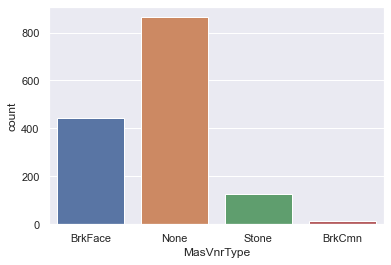

In [50]:

sns.countplot(x = 'MasVnrType', data = housingDf)


In [51]:
# replacing nan with the top option of this field
housingDf['MasVnrType'] = housingDf['MasVnrType'].replace(np.nan, 'None') 


In [52]:
# Checking if there are columns with one unique value since it won't affect our analysis
housingDf.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
LotShape            4
LotConfig           5
Neighborhood       25
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            5
BsmtExposure        5
BsmtFinType1        7
BsmtFinSF1        637
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
BsmtFullBath        4
BsmtHalfBath        3
FullBath            4
HalfBath            3
BedroomAbvGr        8
KitchenAbvGr        4
KitchenQual         4
TotRmsAbvGrd       12
Functional          7
Fireplaces

Checking the Correlation to identify highly correlated features

Text(0.5, 1.0, 'Checking Correlation matrix ')

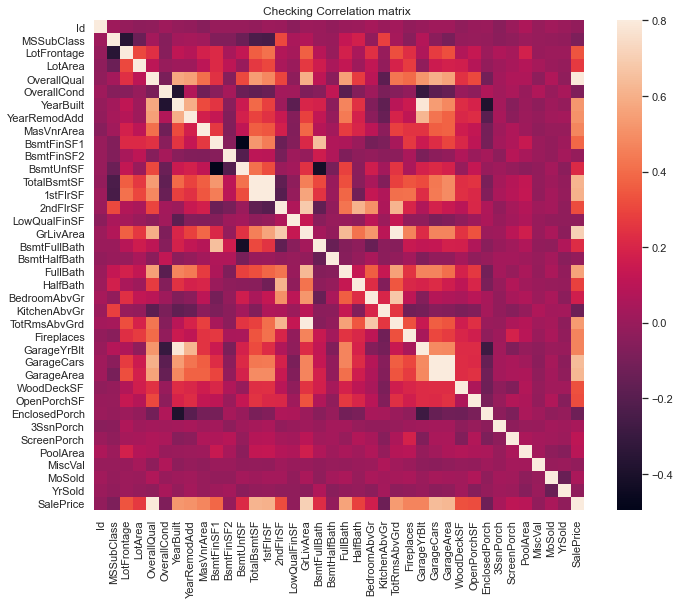

In [53]:
corrDf = housingDf.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrDf, vmax=.8, square=True);
plt.title("Checking Correlation matrix ")

Text(0.5, 1.0, 'Checking Correlation matrix ')

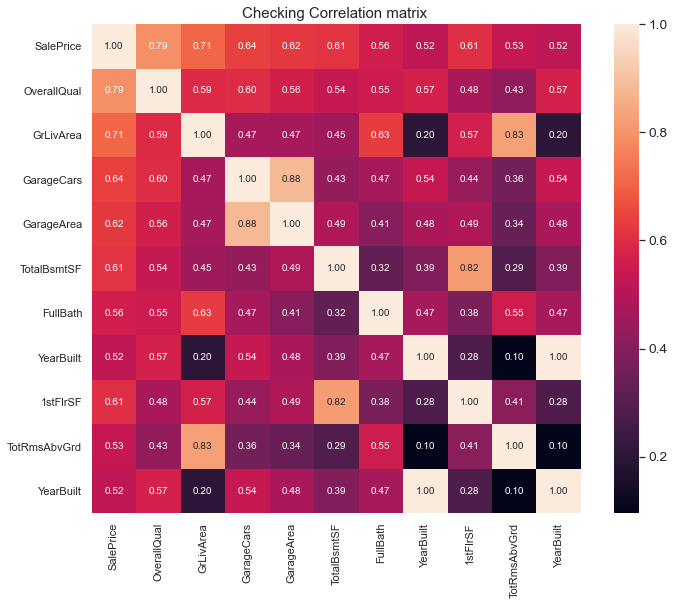

In [54]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea','TotalBsmtSF', 'FullBath', 'YearBuilt','1stFlrSF','TotRmsAbvGrd','YearBuilt']

corrDf = housingDf[cols].corr()
f, ax = plt.subplots(figsize=(12, 9))
cm = np.corrcoef(housingDf[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},yticklabels=cols, xticklabels=cols)

plt.title("Checking Correlation matrix ")

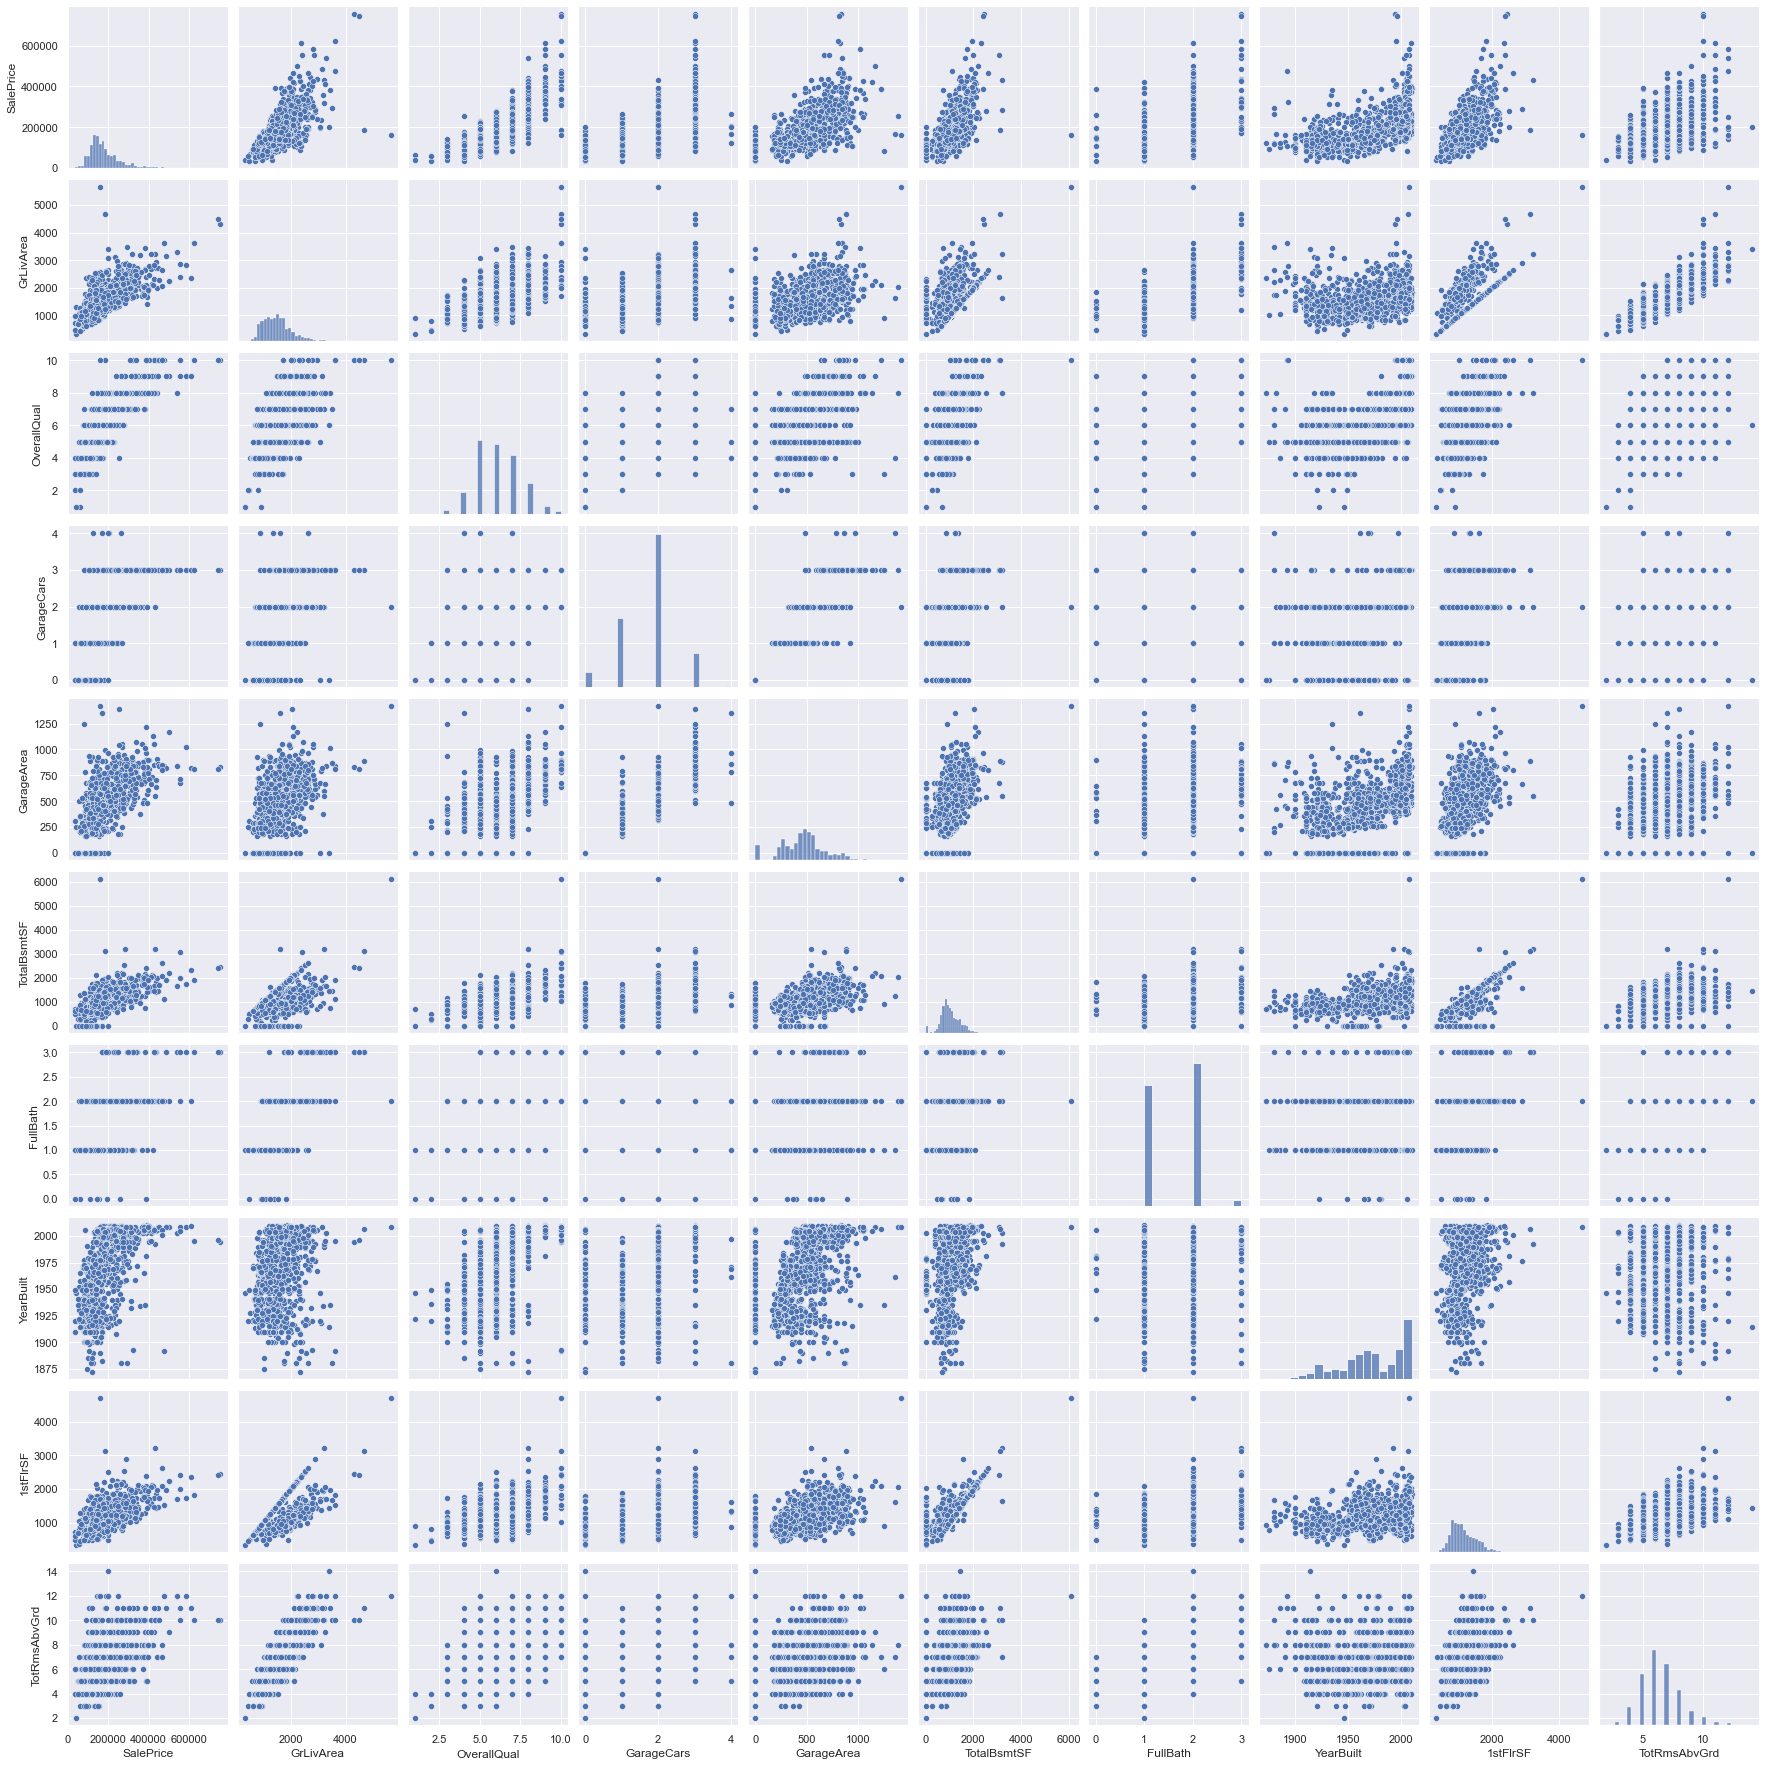

In [55]:
#scatterplot
sns.set()
cols = ['SalePrice','GrLivArea', 'OverallQual', 'GarageCars', 'GarageArea','TotalBsmtSF', 'FullBath', 'YearBuilt','1stFlrSF','TotRmsAbvGrd']

sns.pairplot(housingDf[cols], size = 2.5)
plt.show();

OBSERVATIONS
OverallQual increases, the SalePrice also increases.
People pay more for more living area. There are some outliers in 'GrLivArea'
From the above plot we can say that for GarageCars of 3, the SalePrice is more.
But strange is that the GarageCars==4 having less cost, As it is an outlier we can remove this outlier
For GarageArea of 200–1000 has most of the SalePrice.
1stFirSF of 500–2000 has most of the SalePrice.1st-floor square feet increases, the SalePrice also increases
SalePrice is Right Skwed data


In [56]:
#Converting Numerical to Categorical Variable for creating dummy variables 
housingDf['MSSubClass']=housingDf['MSSubClass'].replace({20:'1-STORY 1946 & NEWER ALL STYLES',30:'1-STORY 1945 & OLDER',40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

housingDf['OverallQual']=housingDf['OverallQual'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})
housingDf['OverallCond']=housingDf['OverallCond'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})

In [57]:
housingDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   BldgType       1460 non-null   object 
 9   HouseStyle     1460 non-null   object 
 10  OverallQual    1460 non-null   object 
 11  OverallCond    1460 non-null   object 
 12  YearBuilt      1460 non-null   int64  
 13  YearRemodAdd   1460 non-null   int64  
 14  RoofStyle      1460 non-null   object 
 15  Exterior1st    1460 non-null   object 
 16  Exterior2nd    1460 non-null   object 
 17  MasVnrType     1460 non-null   object 
 18  MasVnrAr

Deriving Variables

In [58]:
#Converting a Binary varible into numeric datatypes
# mapping it to 0 and 1
housingDf['CentralAir'] = housingDf['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)
                                                  
                                               

In [59]:
numeric_data = housingDf.select_dtypes(include = ['float64','int64'])
numeric_data.columns
cat_values = housingDf.select_dtypes(include=['object'])
cat_values.columns


Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'Heating',
       'HeatingQC', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'SaleType', 'SaleCondition'],
      dtype='object')

In [60]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   YearBuilt      1460 non-null   int64  
 4   YearRemodAdd   1460 non-null   int64  
 5   MasVnrArea     1460 non-null   float64
 6   BsmtFinSF1     1460 non-null   int64  
 7   BsmtFinSF2     1460 non-null   int64  
 8   BsmtUnfSF      1460 non-null   int64  
 9   TotalBsmtSF    1460 non-null   int64  
 10  CentralAir     1460 non-null   int64  
 11  1stFlrSF       1460 non-null   int64  
 12  2ndFlrSF       1460 non-null   int64  
 13  LowQualFinSF   1460 non-null   int64  
 14  GrLivArea      1460 non-null   int64  
 15  BsmtFullBath   1460 non-null   int64  
 16  BsmtHalfBath   1460 non-null   int64  
 17  FullBath       1460 non-null   int64  
 18  HalfBath

In [61]:
# convert into dummies
data_dummies = pd.get_dummies(cat_values, drop_first=True)
data_dummies.head()


,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,...,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [62]:
## Droping the 'Id' column 
housingDf = housingDf.drop(['Id'],axis=1)
# Droping the original categorical column
housingDf = housingDf.drop(list(cat_values.columns), axis=1)
# Adding the dummy categorical column to original dataset
housingDf = pd.concat([housingDf,data_dummies], axis=1)
housingDf.shape

(1460, 225)

Train Test Split

In [63]:
#As observed earlier , since the SalesPrice is right skewed data , we are taking log(salesprice) to make it a normal distribution
df_train,df_test = train_test_split(housingDf, train_size=0.7,test_size = 0.3, random_state=42)
y_train = np.log(df_train.SalePrice)
X_train = df_train.drop("SalePrice",1)

y_test= np.log(df_test.SalePrice)
X_test = df_test.drop("SalePrice",1)

In [66]:
scaler = StandardScaler()
num_values=X_train.select_dtypes(include=['int64','float64']).columns
X_train[num_values] = scaler.fit_transform(X_train[num_values])
X_test[num_values] = scaler.transform(X_test[num_values])


Model Building and Evaluation

Ridge 

In [100]:
# list of alphas to tune
params = {'alpha': [0.00004,0.0001, 0.001, 0.01, 0.1, 10,100,1000]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [4e-05, 0.0001, 0.001, 0.01, 0.1, 10, 100,
                                   1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [101]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007582,0.001871,0.003657,0.001025,0.00004,{'alpha': 4e-05},0.832841,0.522291,0.861351,0.863057,0.808039,0.777516,0.129211,8,0.930402,0.960614,0.927348,0.931244,0.933459,0.936613,0.012159
1,0.005578,0.000523,0.002731,0.000411,0.0001,{'alpha': 0.0001},0.832905,0.522297,0.861364,0.863072,0.808065,0.777541,0.129219,7,0.930402,0.960614,0.927348,0.931244,0.933459,0.936613,0.012159
2,0.005335,0.000598,0.002447,0.000089,0.001,{'alpha': 0.001},0.833830,0.522382,0.861563,0.863283,0.808456,0.777903,0.129337,6,0.930400,0.960614,0.927348,0.931244,0.933459,0.936613,0.012160
3,0.005388,0.000246,0.002595,0.000260,0.01,{'alpha': 0.01},0.840981,0.523268,0.863331,0.865024,0.811596,0.780840,0.130229,5,0.930327,0.960606,0.927340,0.931211,0.933440,0.936585,0.012169
4,0.005502,0.000425,0.002634,0.000224,0.1,{'alpha': 0.1},0.861570,0.530875,0.872309,0.871388,0.821514,0.791531,0.131642,3,0.929273,0.960263,0.927016,0.930563,0.932989,0.936021,0.012274


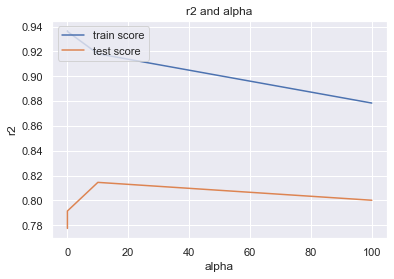

In [102]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')
plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [90]:
#optimum alpha

alpha = 8
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.score(X_train,y_train)


0.9147573506508678

In [91]:
ridge.score(X_test,y_test)

0.8872903132394235

In [96]:
# Ridge model parameters
model_parameters = list(sorted(ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = housingDf.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.08),
 ('LotFrontage', -0.128),
 ('LotArea', -0.121),
 ('YearBuilt', -0.085),
 ('YearRemodAdd', -0.077),
 ('MasVnrArea', -0.069),
 ('BsmtFinSF1', -0.068),
 ('BsmtFinSF2', -0.066),
 ('BsmtUnfSF', -0.064),
 ('TotalBsmtSF', -0.06),
 ('CentralAir', -0.057),
 ('1stFlrSF', -0.057),
 ('2ndFlrSF', -0.056),
 ('LowQualFinSF', -0.052),
 ('GrLivArea', -0.052),
 ('BsmtFullBath', -0.052),
 ('BsmtHalfBath', -0.052),
 ('FullBath', -0.051),
 ('HalfBath', -0.051),
 ('BedroomAbvGr', -0.051),
 ('KitchenAbvGr', -0.05),
 ('TotRmsAbvGrd', -0.05),
 ('Fireplaces', -0.048),
 ('GarageYrBlt', -0.046),
 ('GarageCars', -0.043),
 ('GarageArea', -0.043),
 ('WoodDeckSF', -0.038),
 ('OpenPorchSF', -0.037),
 ('EnclosedPorch', -0.036),
 ('3SsnPorch', -0.035),
 ('ScreenPorch', -0.035),
 ('PoolArea', -0.034),
 ('MiscVal', -0.034),
 ('MoSold', -0.033),
 ('YrSold', -0.033),
 ('SalePrice', -0.031),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.031),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.029),
 ('MSSubClas

Lasso

Fitting 5 folds for each of 8 candidates, totalling 40 fits


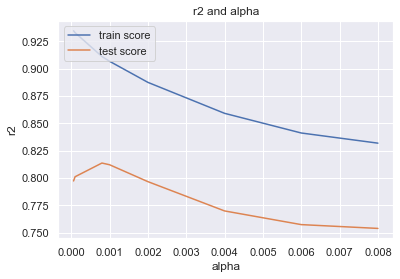

In [105]:

params = {'alpha': [0.00006,0.0001, 0.0008, 0.001, 0.002, 0.004, 0.006, 0.008 ]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')

plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [110]:
#optimum alpha

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.score(X_train,y_train)

0.8996198576361356

In [107]:
lasso.score(X_test,y_test)

0.8851793169901556

In [112]:
# lasso model parameters
model_parameters = list(sorted(lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = housingDf.columns
cols = cols.insert(0, "constant")
list((zip(cols, model_parameters)))

[('constant', 11.964),
 ('LotFrontage', -0.165),
 ('LotArea', -0.154),
 ('YearBuilt', -0.09),
 ('YearRemodAdd', -0.061),
 ('MasVnrArea', -0.051),
 ('BsmtFinSF1', -0.049),
 ('BsmtFinSF2', -0.042),
 ('BsmtUnfSF', -0.039),
 ('TotalBsmtSF', -0.037),
 ('CentralAir', -0.036),
 ('1stFlrSF', -0.032),
 ('2ndFlrSF', -0.029),
 ('LowQualFinSF', -0.028),
 ('GrLivArea', -0.028),
 ('BsmtFullBath', -0.026),
 ('BsmtHalfBath', -0.023),
 ('FullBath', -0.023),
 ('HalfBath', -0.022),
 ('BedroomAbvGr', -0.021),
 ('KitchenAbvGr', -0.019),
 ('TotRmsAbvGrd', -0.013),
 ('Fireplaces', -0.013),
 ('GarageYrBlt', -0.013),
 ('GarageCars', -0.012),
 ('GarageArea', -0.012),
 ('WoodDeckSF', -0.011),
 ('OpenPorchSF', -0.011),
 ('EnclosedPorch', -0.01),
 ('3SsnPorch', -0.009),
 ('ScreenPorch', -0.009),
 ('PoolArea', -0.009),
 ('MiscVal', -0.006),
 ('MoSold', -0.005),
 ('YrSold', -0.005),
 ('SalePrice', -0.005),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.003),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.002),
 ('MSSubCl

Conclusion :
we got a decent score for both Ridge and Lasso regression.
Ridge : Train :91.4 Test :88.7
Lasso : Train :89.9 Test :88.5
Top 5 most significant variables in Ridge are:
('SaleCondition_AdjLand', 0.092),
 ('SaleCondition_Alloca', 0.092),
 ('SaleCondition_Family', 0.104),
 ('SaleCondition_Normal', 0.138),
 ('SaleType_WD', 0.091)
Top 5 most significant variables in Lasso are:
 ('SaleCondition_AdjLand', 0.101),
 ('SaleCondition_Alloca', 0.105),
 ('SaleCondition_Family', 0.112),
 ('SaleCondition_Normal', 0.186),
 ('SaleType_WD', 0.096)
These Varaiables are directly proportional to each other.
Optimal Value of lamda for ridge : 8
Optimal Value of lamda for Lasso : 0.001
Because of less Feature selection Lasso regression is selected 